In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [5]:
b = 100/4.0 # controls bed fluctuations
# rates (the mean numbers are from ancey2008) 
nu = 10.99
la0 = 21.40
la1 = la0/b # should set scale of fluctuations
si0 = 4.91
si1 = si0/b
ga = 0.74
mu0 = 3.47
mu1 = mu0/b
#print('mean rate at z=0 is ' + str(la0/(si0+ga-mu)))

# dimensions
a = 0.25
dx = 22.5 
phi = 0.6

# initial values 
n0 = 20 
m0 = 500

# rate functions
def z(n,m):
    return np.pi*a**2/(phi*dx)*(m-m0)
def Lam(n,m):
    return np.heaviside(la0+la1*z(n,m),1)*(la0+la1*z(n,m))
def Mu(n,m): # you get skew if you mix n*m**2 
    # no skew if you mix n*z(m), i.e. n*(k+m)
    # no skew if you mix n*m
    # no skew if you mix n**0.5*m
    # maybe skew if you mix n*m**3 ? .. it blows out 
    # if you mix n*m**1.1?
    return  (mu0 + mu1*z(n,m))*n*np.heaviside(mu0 + mu1*z(n,m),1)
def Sig(n,m):
    if si0-si1*z(n,m)<0:
        print('sigma problem')
    return np.heaviside(si0-si1*z(n,m),1)*(si0-si1*z(n,m))

In [758]:
def react(n,m,t):
     # migrate in, entrain, deposit, migrate out
    A = np.array([nu,Lam(n,m)+ Mu(n,m),n*Sig(n,m),n*ga])
    a0 = A.sum()
    r1,r2 = np.random.uniform(size=2)
    tau = 1/a0*np.log(1/r1)
    t+=tau
    i = np.argmax(np.cumsum(A/a0)>r2)
    if i==0:
        n+=1
    elif i==1:
        n+=1
        m-=1
    elif i==2:
        n-=1
        m+=1
    elif i==3:
        n-=1
    return n,m,t

def view(S):
    n,m,t = np.array(S).T
    M,Cm = np.unique(m,return_counts=True)
    N,Cn = np.unique(n,return_counts=True)
    plt.subplot(1, 2, 1)
    plt.scatter(z(N,M)/(2*a),Cm/Cm.sum())
    plt.xlabel('bed elevation (in grain diameters)')
    plt.xlim(-3,3)
    plt.ylabel('pdf')
    plt.subplot(1, 2, 2)
    plt.scatter(N,Cn/Cn.sum(),color='purple')
    plt.xlabel('particle activity')
    plt.show()

In [ ]:
n = n0
m = m0
t = 0
S = []
t1 = 200
while t < 10000000:
    n,m,t = react(n,m,t)
    if t>t1:
        t1+=5
        S.append(np.copy(np.array((n,m,t))))

# to do:
0) clarify the b issue. What controls the elevation fluctuations? 
1) calculate correlation function of n and m 
2) calculate conditional distributions of n given m 
3) calculate return times on bed elevations: burial time distribution for particles at z 
4) draw conclusions about the effect of bed elevation on the transport rate distribution
5) draw conclusions about the burial time distribution, whether it is heavy-tailed, and reprecussions for anomalous diff. 
6) 

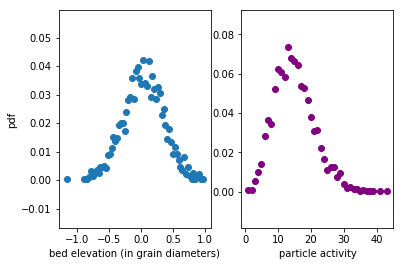

In [559]:
view(S) # 15a without mu1

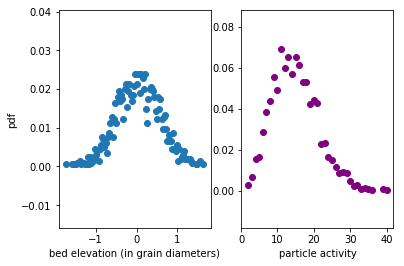

In [564]:
view(S) #50a without mu1

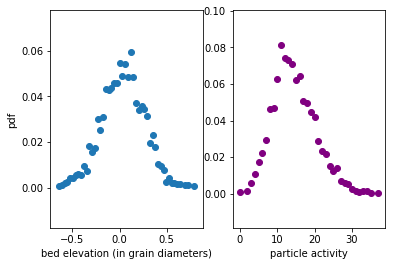

In [576]:
view(S) #5a on si and 250a on la1 without mu1. Does this induce assymmetry in bed elevation pdf? 

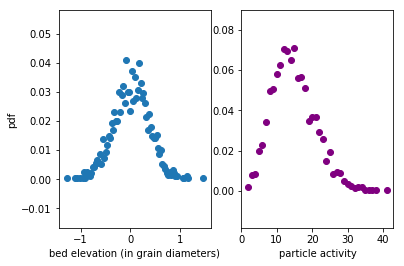

In [580]:
view(S) #15a on si and 250a on la1 without mu1.Is the variance controlled by only one of of la1 si1? 
# yes. 

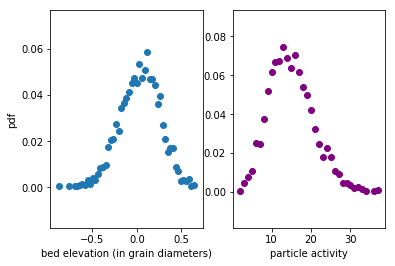

In [590]:
view(S) #5a on si and 250a on la1 without mu1.Is the variance controlled by only one of of la1 si1? 
# if yes, should get variance of 0.5

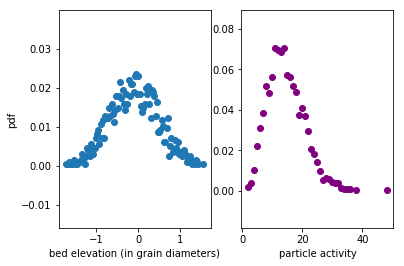

In [598]:
view(S) # 15a la1, 250a si1, no mu1

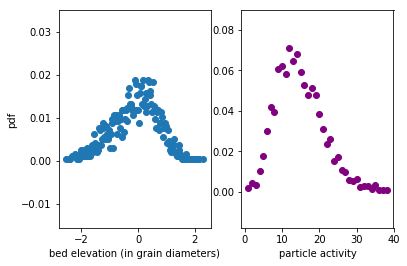

In [602]:
view(S) # 30a la1, 250a si1, no mu1

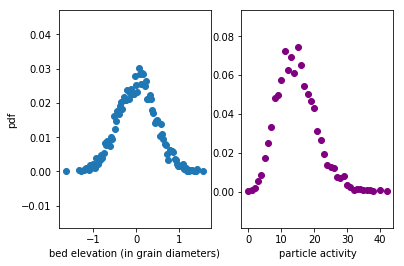

In [608]:
view(S) # 30a la1, 30a si1, no mu1

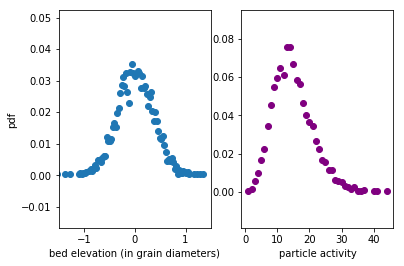

In [616]:
view(S) # 30a la1, 30a si1, 30a mu1

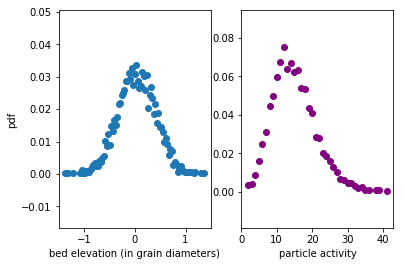

In [619]:
view(S) # 30a la1, 30a si1, 150a mu1

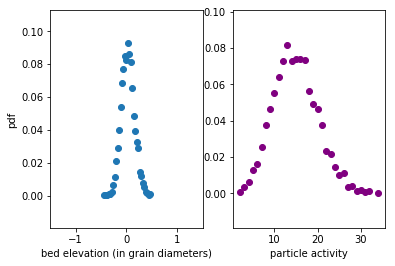

In [623]:
view(S) # 30a la1, 30a si1, a mu1

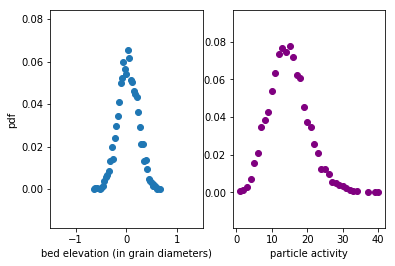

In [627]:
view(S) # 30a la1, 30a si1, 3a mu1

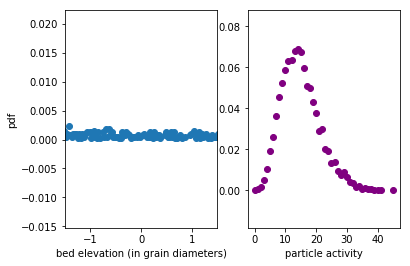

In [631]:
view(S) # without la1 si1 or mu1

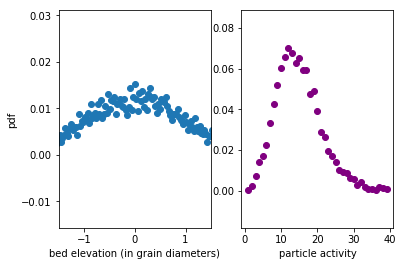

In [638]:
view(S) #with la1 30a and no si1 or mu1

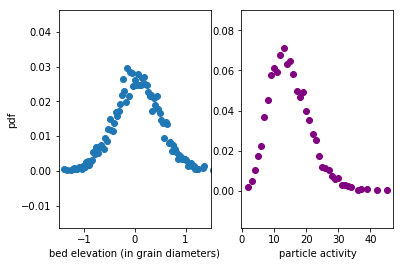

In [642]:
view(S) #with la1 30a and si1 30a and no mu1

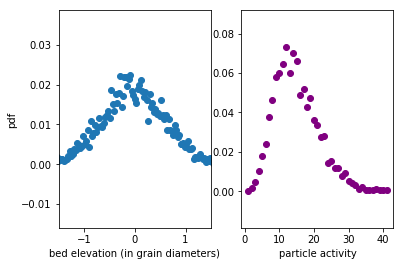

In [647]:
view(S) #with la1 60a and si1 60a and no mu1

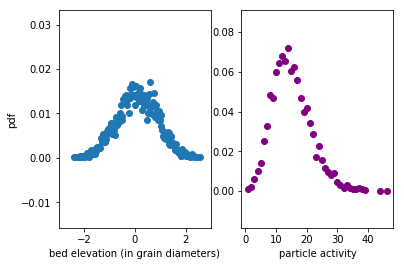

In [653]:
view(S) #with la1 100a and si1 100a and no mu1

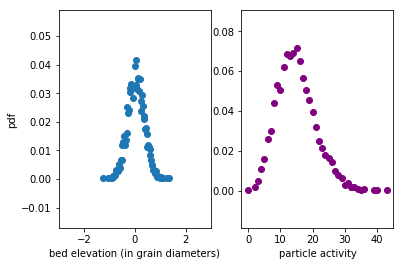

In [657]:
view(S) #with la1 100a and si1 100a and mu1 = 10a 

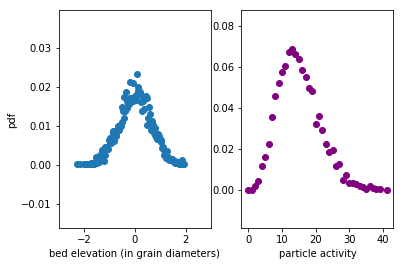

In [661]:
view(S) #with la1 100a and si1 100a and mu1 = 100a 

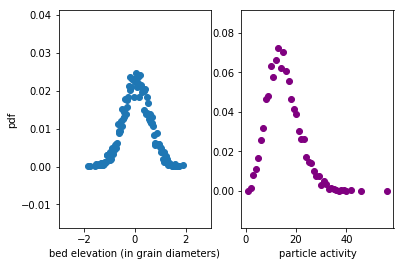

In [666]:
view(S) #with la1 50a and si1 50a and mu1 = 100a 

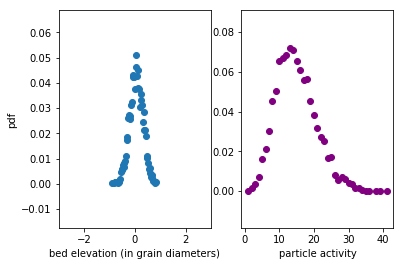

In [671]:
view(S) #with la1 50a and si1 10a and mu1 = 30a 

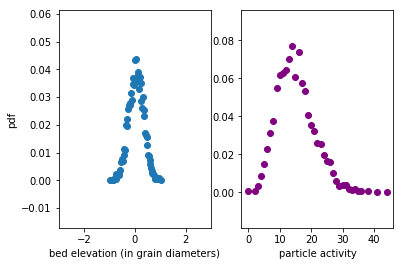

In [675]:
view(S) #with la1 50a and si1 10a and mu1 = 0

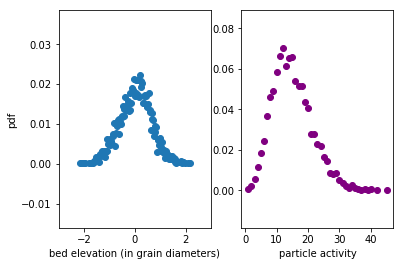

In [683]:
view(S) #with la1/la0=si1/si0=mu1/mu0 = 1/b

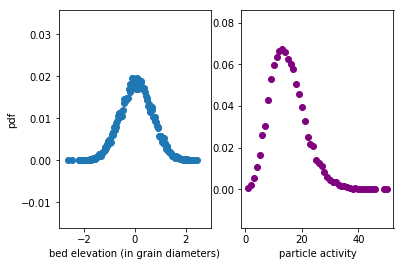

In [756]:
view(S)

ok, now you know you can't get a skew pdf of bed elevation without mixing terms due to collective motion like n*m**2
now the question is, under what conditions without a mu term can you get non-poissonian fluctuations? Can you replicate ancey2008 without a collective entrainment term due to co-coordination of topography and normal entrainment? 
Seemingly you have this in

you learned that the variance of the bed elevation pdf is controlled by only one of la1/si1. It takes its value from the 
two

the particle activity distribution appears pretty unaffected by la1 si1. This is actually nice and makes things easier. 

Now study the influence of mu1... 
when mu1/mu0 is greater than la1/la0 and si1/si0, it dominates the strength of fluctuations. 
It does not induce skew. 

What about when mu1/mu0 is greater than one of la1/la0 and si1/si0? 
the largest one still dominates the strength of bed elevation fluctuations. 
Therefore there is no reason not to make them the same... 

THe length scales of variation at order z should be the same for all parameters, except with different signs





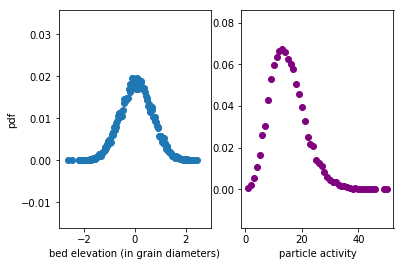

In [694]:
view(S)

In [696]:
# now use the long time series to develop the conditional pdf of particle activity over bed elevation
n,m,t = np.array(S).T
M,Cm = np.unique(m,return_counts=True)
N,Cn = np.unique(n,return_counts=True)

In [733]:
def conditional_n(n,m,m_c):
    n_marginal = n[np.where(m==m_c)]
    N,C = np.unique(n_marginal,return_counts=True)
    return N,C/C.sum()

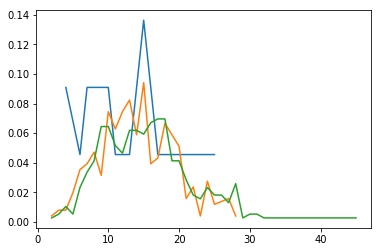

In [739]:
for i in [35,75,105]:
    Nc,Cc = conditional_n(n,m,m[76+i])
    plt.plot(Nc,Cc)

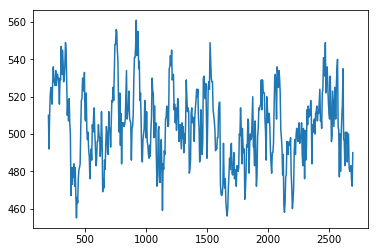

In [742]:
plt.plot(t[:500],m[:500])

In [750]:
m_smooth = np.convolve(m,np.ones(1000)/1000)

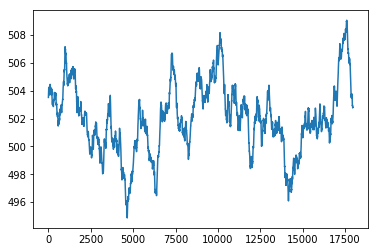

In [752]:
plt.plot(m_smooth[1500:-1500])